<a href="https://colab.research.google.com/github/AROP019/Proyecto-PrediccionIndicadores/blob/main/truly_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación de Datos

In [ ]:
# Importar librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [ ]:
datos = pd.read_csv('data_vulcar.csv')
datos.head()

,municipio,vul_car_pob,NOM_MUN,NOM_LOC,PCON_LIMI,PHOG_IND,P5_HLI_NHE,PCON_DISC,VPH_PISODT,VPH_S_ELEC
0,Aguascalientes,"257,144",Aguascalientes,Total del Municipio,116705.0,4050.0,8.0,47525.0,264662.0,438.0
1,Asientos,"19,243",Asientos,Total del Municipio,4551.0,43.0,0.0,2886.0,12330.0,95.0
2,Calvillo,"21,199",Calvillo,Total del Municipio,6760.0,173.0,1.0,4088.0,15336.0,112.0
3,Cosío,"5,138",Cosío,Total del Municipio,1933.0,15.0,0.0,805.0,3891.0,25.0
4,Jesús María,"42,186",Jesús María,Total del Municipio,11904.0,395.0,1.0,5036.0,32719.0,155.0


In [ ]:
datos.columns

Index(['municipio', 'vul_car_pob', 'NOM_MUN', 'NOM_LOC', 'PCON_LIMI',
       'PHOG_IND', 'P5_HLI_NHE', 'PCON_DISC', 'VPH_PISODT', 'VPH_S_ELEC'],
      dtype='object')

In [ ]:
# Eliminar columnas no numéricas

datos.drop(columns='municipio', inplace=True)
datos.drop(columns='NOM_MUN', inplace=True)
datos.drop(columns='NOM_LOC', inplace=True)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vul_car_pob  2469 non-null   object 
 1   PCON_LIMI    2440 non-null   float64
 2   PHOG_IND     2440 non-null   float64
 3   P5_HLI_NHE   2440 non-null   float64
 4   PCON_DISC    2440 non-null   float64
 5   VPH_PISODT   2440 non-null   float64
 6   VPH_S_ELEC   2440 non-null   float64
dtypes: float64(6), object(1)
memory usage: 135.2+ KB


In [ ]:
datos.isnull().sum()

,0
vul_car_pob,0
PCON_LIMI,29
PHOG_IND,29
P5_HLI_NHE,29
PCON_DISC,29
VPH_PISODT,29
VPH_S_ELEC,29


In [ ]:
# Reemplaza 'n.d' con NaN en e imputar datos
datos.replace('n.d', np.nan, inplace=True)
datos['vul_car_pob'] = datos['vul_car_pob'].str.replace(',', '').astype(float)
datos.fillna(datos.median(), inplace=True)
datos.isnull().sum()

,0
vul_car_pob,0
PCON_LIMI,0
PHOG_IND,0
P5_HLI_NHE,0
PCON_DISC,0
VPH_PISODT,0
VPH_S_ELEC,0


In [ ]:
# Asegurar que los datos sean float
datos = datos.astype(float)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2469 entries, 0 to 2468
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   vul_car_pob  2469 non-null   float64
 1   PCON_LIMI    2469 non-null   float64
 2   PHOG_IND     2469 non-null   float64
 3   P5_HLI_NHE   2469 non-null   float64
 4   PCON_DISC    2469 non-null   float64
 5   VPH_PISODT   2469 non-null   float64
 6   VPH_S_ELEC   2469 non-null   float64
dtypes: float64(7)
memory usage: 135.2 KB


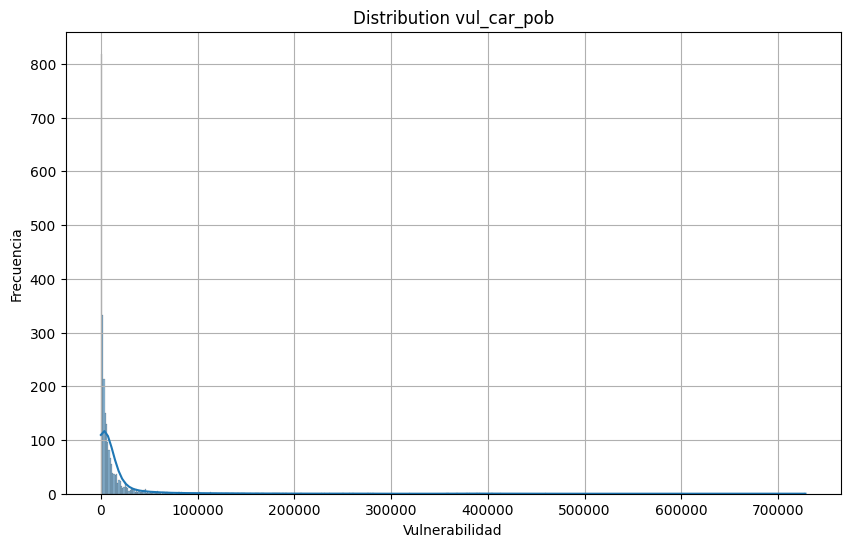

In [ ]:
# Plot the distribution of 'vul_car_pob'
plt.figure(figsize=(10, 6))
sns.histplot(datos['vul_car_pob'], kde=True)
plt.title('Distribution vul_car_pob')
plt.xlabel('Vulnerabilidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:

# Calculate the IQR
Q1 = datos['vul_car_pob'].quantile(0.25)
Q3 = datos['vul_car_pob'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
datos = datos[(datos['vul_car_pob'] >= lower_bound) & (datos['vul_car_pob'] <= upper_bound)]

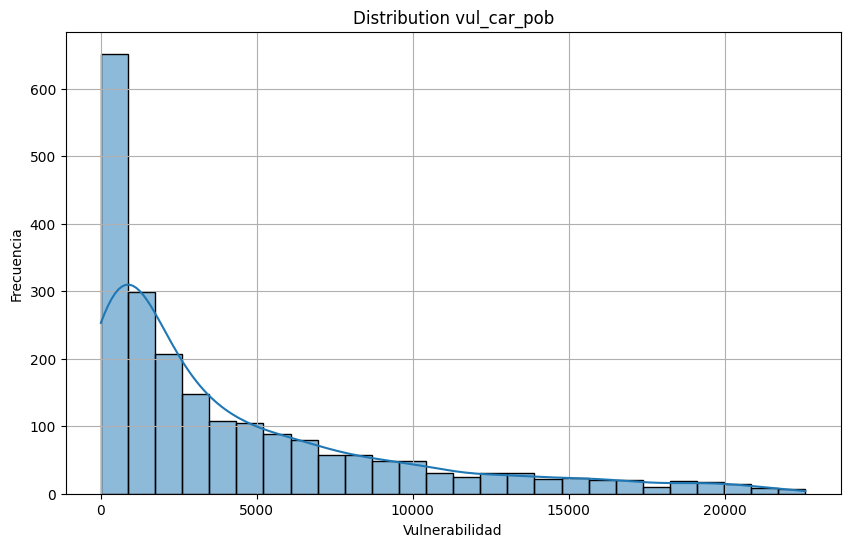

In [ ]:
# Plot the distribution of 'vul_car_pob'
plt.figure(figsize=(10, 6))
sns.histplot(datos['vul_car_pob'], kde=True)
plt.title('Distribution vul_car_pob')
plt.xlabel('Vulnerabilidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
# Separar las variables predictoras (X) y la variable objetivo (y)
columnas_utilizar = datos.columns[:10]
X = datos[columnas_utilizar].drop(columns=["vul_car_pob"])
y = datos["vul_car_pob"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelo SVR

## Sin Híperparametros

In [ ]:
#SVR SIN HP

modelo = SVR()
modelo.fit(X_train, y_train)

# Predecir con el modelo entrenado
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print('R^2: ', r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Error Cuadrático Medio (MSE): 23757949.54346813
R^2:  -0.06440923694032574
MAE: 3215.7378317055172
RMSE:  4874.212710117207


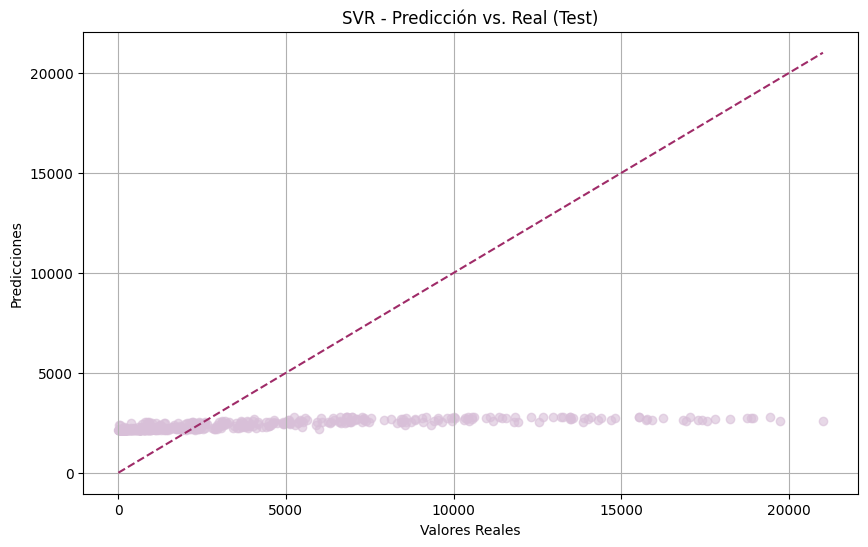

In [ ]:
# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicciones", color='#D8BFD8')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#9F2B68', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('SVR - Predicción vs. Real (Test)')
plt.grid(True)
plt.show()

Error Cuadrático Medio (MSE): 28721574.085483592
R^2:  -0.0940585326971739
MAE: 3441.355356055899
RMSE:  5359.251261648738


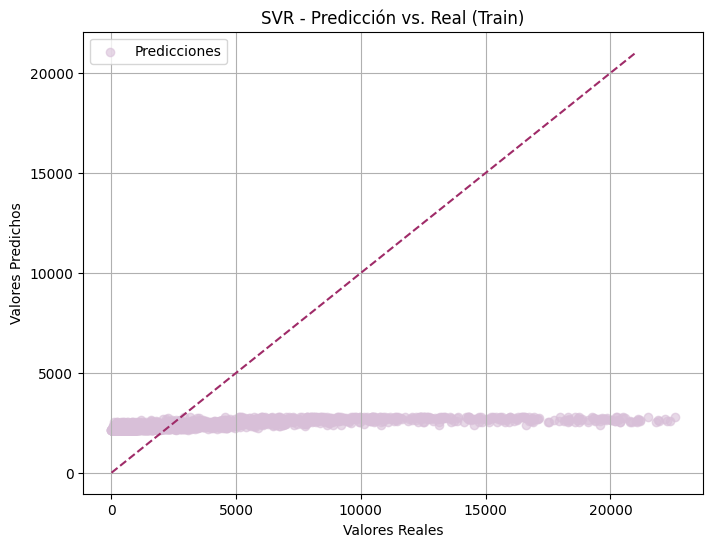

In [ ]:
# Predecir sobre el conjunto de prueba
y_pred = modelo.predict(X_train)

# Evaluar el modelo
mse = mean_squared_error(y_train, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print('R^2: ', r2_score(y_train, y_pred))
print("MAE:", mean_absolute_error(y_train, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

# Gráfico de dispersión: Valores reales vs. Predichos
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_pred, alpha=0.6, label="Predicciones", color='#D8BFD8')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#9F2B68', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title('SVR - Predicción vs. Real (Train)')
plt.legend()
plt.grid(True)
plt.show()

## Uso de híperparametros y validación cruzada

In [ ]:
import matplotlib.pyplot as plt

# Definir el modelo SVR
modelo = SVR()

# Definir la grilla de hiperparámetros para GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Tipos de kernel
    'C': [0.1, 1, 10, 100],              # Parámetro de regularización
    'epsilon': [0.01, 0.1, 0.5, 1],      # Margen de error en SVR
    'gamma': ['scale', 'auto']           # Coeficiente del kernel (solo para 'rbf' y 'poly')
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Métrica de evaluación (MSE negativo)
    cv=5,                             # Número de folds en la validación cruzada
    verbose=1,                        # Nivel de verbosidad (1 para ver progreso)
    n_jobs=-1                         # Usar todos los núcleos del CPU
)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
mejores_hiperparametros = grid_search.best_params_
print(f"Mejores hiperparámetros: {mejores_hiperparametros}")

# Obtener el mejor modelo
mejor_modelo = grid_search.best_estimator_

# Predecir con el mejor modelo
y_pred = mejor_modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print('R^2: ', r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Mejores hiperparámetros: {'C': 100, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Error Cuadrático Medio (MSE): 4164094.454107731
R^2:  0.8134392619895583
MAE: 1227.4955993561969
RMSE:  2040.6112942223297


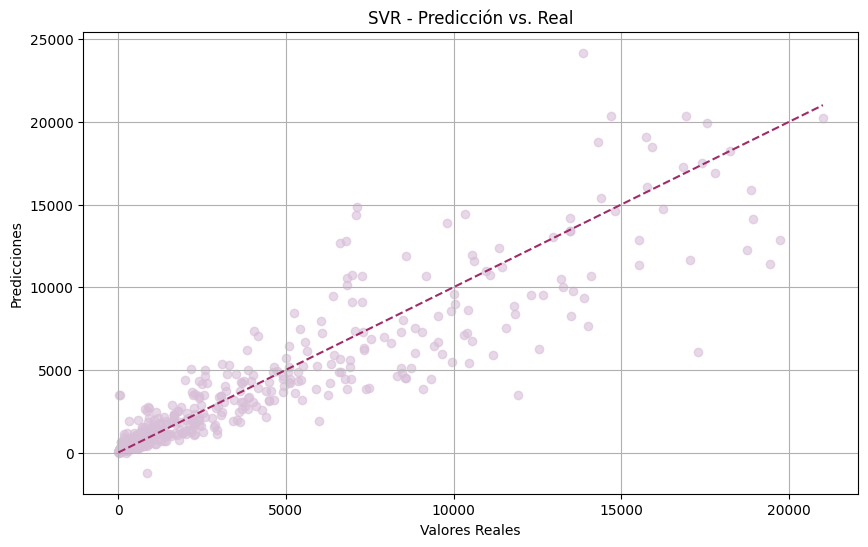

In [ ]:
# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicciones", color='#D8BFD8')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#9F2B68', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('SVR - Predicción vs. Real')
plt.grid(True)
plt.show()

# Regresión LASSO

## Antes de híperparametros

In [ ]:
# Regresión Lasso sin híperparametros

modelo_lasso = Lasso()
modelo_lasso.fit(X_train, y_train)

# Predecir con el modelo entrenado
y_pred = modelo_lasso.predict(X_test)

# Evaluar el modelo
print("R^2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R^2: 0.816276273855048
MSE: 4100771.455381911
MAE: 1284.8315888005436
RMSE: 2025.0361614998164


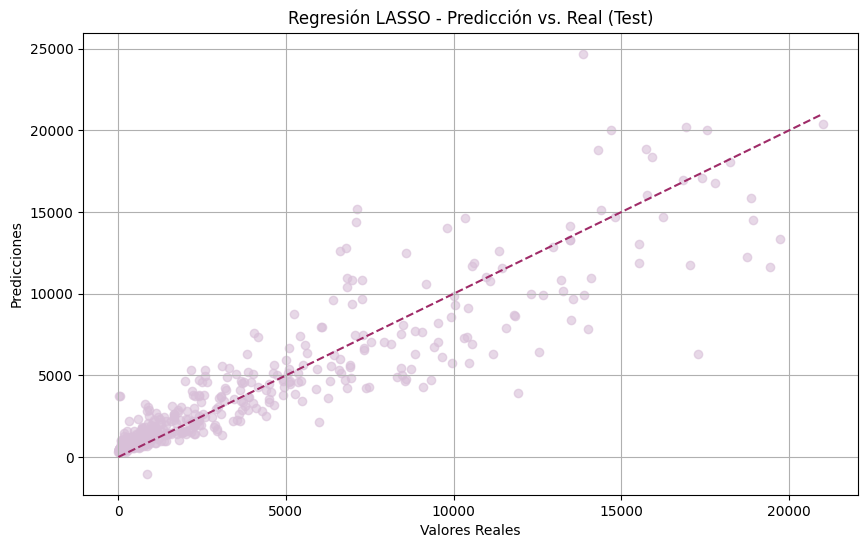

In [ ]:
# Graficar las predicciones vs los valores reales conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicciones", color='#D8BFD8')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#9F2B68', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión LASSO - Predicción vs. Real (Test)')
plt.grid(True)
plt.show()

Error Cuadrático Medio (MSE): 4640246.483949443
R^2:  0.8232443234318134
MAE: 1336.1680096870862
RMSE:  2154.1231357444362


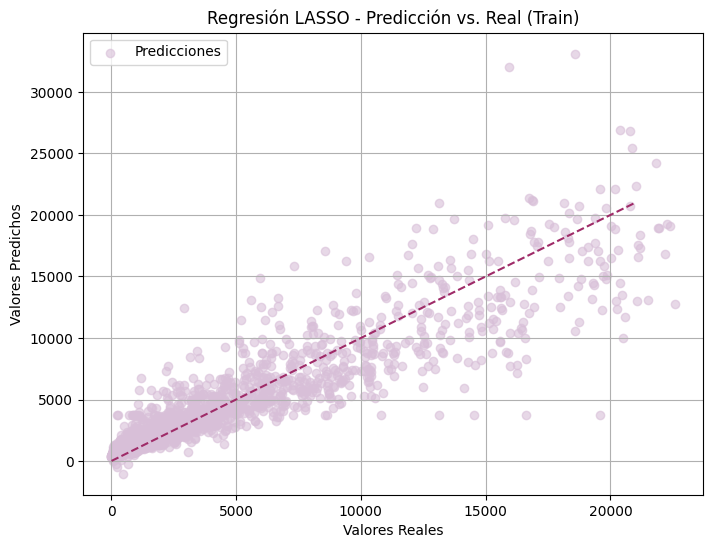

In [ ]:
# Predecir sobre el conjunto de entrenamiento
y_pred = modelo_lasso.predict(X_train)

# Evaluar el modelo
mse = mean_squared_error(y_train, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print('R^2: ', r2_score(y_train, y_pred))
print("MAE:", mean_absolute_error(y_train, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

# Gráfico de dispersión: Valores reales vs. Predichos
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_pred, alpha=0.6, label="Predicciones", color='#D8BFD8')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#9F2B68', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title('Regresión LASSO - Predicción vs. Real (Train)')
plt.legend()
plt.grid(True)
plt.show()

## Uso de híperparametros y validación cruzada

In [ ]:
# Definir el modelo base
modelo_lasso = Lasso()

# Definir los valores de alpha a probar
param_grid = {'alpha': np.logspace(-4, 1, 50)}  # Valores entre 0.0001 y 10

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(modelo_lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_lasso = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred = best_lasso.predict(X_test)

# Evaluar el modelo
print("Mejor alpha:", grid_search.best_params_['alpha'])
print("R^2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Mejor alpha: 6.250551925273976
R^2: 0.8163347217199957
MSE: 4099466.8806204754
MAE: 1286.1562968488806
RMSE: 2024.7140244045518


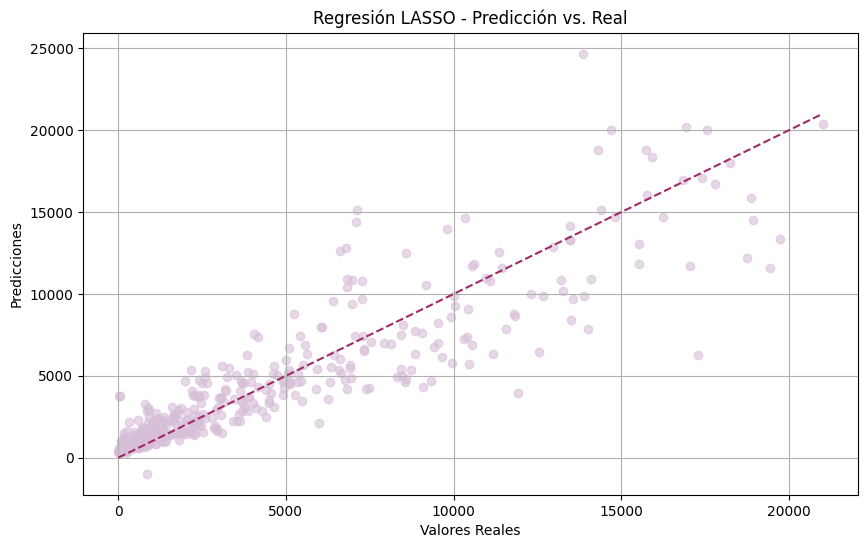

In [ ]:
# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicciones", color='#D8BFD8')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#9F2B68', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión LASSO - Predicción vs. Real')
plt.grid(True)
plt.show()

# XGBoost

## Sin híperparametros

In [ ]:
# Entrenar el modelo XGBoost
modelo_xgb = XGBRegressor()
modelo_xgb.fit(X_train, y_train)
y_pred = modelo_xgb.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print('R^2: ', r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Error Cuadrático Medio (MSE): 4892260.281547023
R^2:  0.7808158055194367
MAE: 1318.855728815455
RMSE:  2211.8454470299284


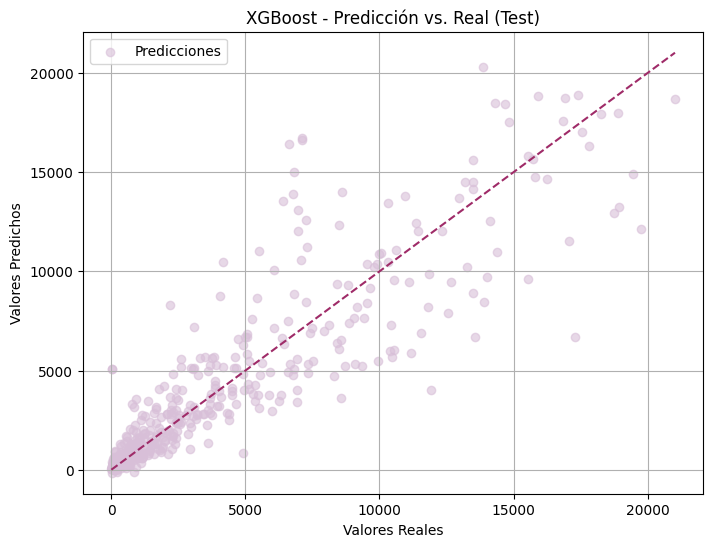

In [ ]:
# Gráfico de dispersión: Valores reales vs. Predichos
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicciones",color='#D8BFD8')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#9F2B68', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("XGBoost - Predicción vs. Real (Test)")
plt.legend()
plt.grid(True)
plt.show()

Error Cuadrático Medio (MSE): 479988.8735217936
R^2:  0.9817163251180708
MAE: 216.60736573125243
RMSE:  692.8122931370326


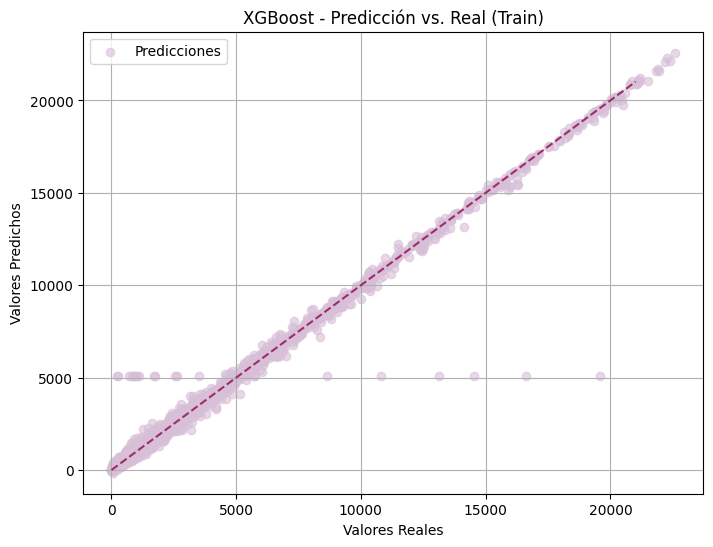

In [ ]:
# Predecir sobre el conjunto de prueba
y_pred = modelo_xgb.predict(X_train)

# Evaluar el modelo
mse = mean_squared_error(y_train, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print('R^2: ', r2_score(y_train, y_pred))
print("MAE:", mean_absolute_error(y_train, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred)))

# Gráfico de dispersión: Valores reales vs. Predichos
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_pred, alpha=0.6, label="Predicciones", color='#D8BFD8')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#9F2B68', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title('XGBoost - Predicción vs. Real (Train)')
plt.legend()
plt.grid(True)
plt.show()

## Híperparametros y validación cruzada

In [ ]:
# Definir el modelo XGBoost
modelo_xgb = XGBRegressor(objective='reg:squarederror')

# Definir los posibles valores para los hiperparámetros
parametros_XGB = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]
}

# Usar RandomizedSearchCV para encontrar los mejores hiperparámetros
random_search_XGB = RandomizedSearchCV(estimator=modelo_xgb, param_distributions=parametros_XGB,
                                       n_iter=20, cv=5, scoring='neg_mean_squared_error')

random_search_XGB.fit(X_train, y_train)

# Mejor modelo encontrado
mejor_modelo = random_search_XGB.best_estimator_

# Predicciones en el conjunto de entrenamiento
y_pred = mejor_modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print('R^2: ', r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))



Error Cuadrático Medio (MSE): 4303180.193317985
R^2:  0.8072079100258207
MAE: 1228.9924412919295
RMSE:  2074.4108063057292


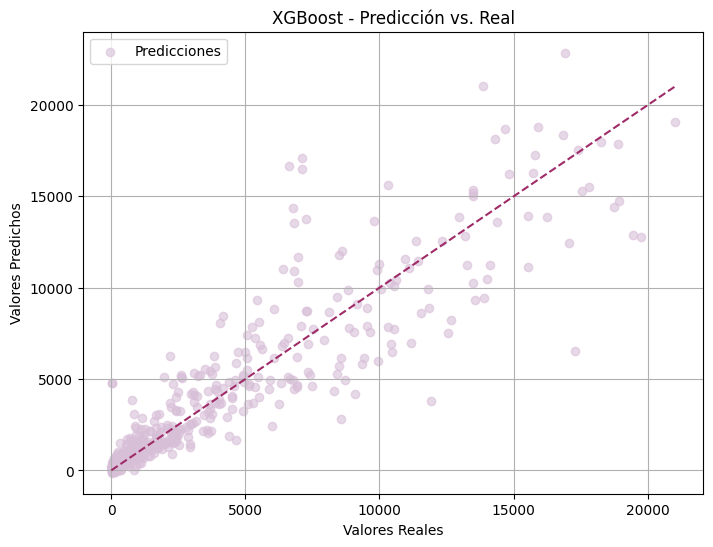

In [ ]:
# Gráfico de dispersión: Valores reales vs. Predichos
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicciones",color='#D8BFD8')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#9F2B68', linestyle='--')
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("XGBoost - Predicción vs. Real")
plt.legend()
plt.grid(True)
plt.show()

# Revisión de Datos (again)

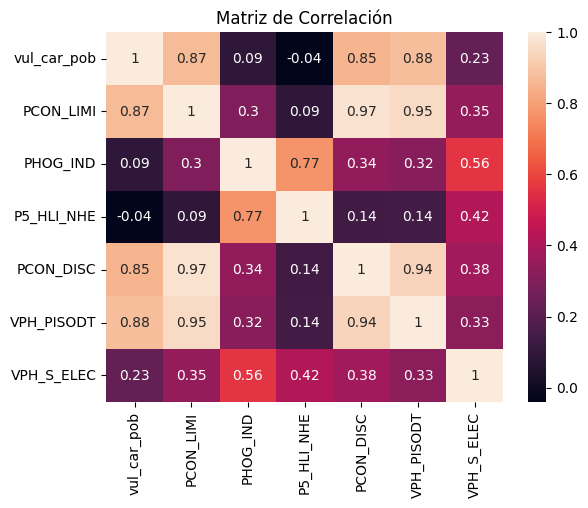

In [ ]:
#Revisar correlación de variables
correlacion = datos.corr()
sns.heatmap(correlacion, annot=True)
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
#Eliminar columnas no relevantes

cleanData = datos.drop(columns=['PHOG_IND','P5_HLI_NHE'])
cleanData

,vul_car_pob,PCON_LIMI,PCON_DISC,VPH_PISODT,VPH_S_ELEC
1,19243.0,4551.0,2886.0,12330.0,95.0
2,21199.0,6760.0,4088.0,15336.0,112.0
3,5138.0,1933.0,805.0,3891.0,25.0
5,14285.0,5833.0,2624.0,11350.0,67.0
6,17154.0,6689.0,3323.0,13337.0,90.0
...,...,...,...,...,...
2463,3624.0,1536.0,917.0,3450.0,31.0
2464,3457.0,2233.0,1404.0,4877.0,33.0
2465,9999.0,3954.0,2129.0,8933.0,75.0
2467,3501.0,1958.0,1020.0,4590.0,27.0


In [ ]:
# Separar las variables predictoras (X) y la variable objetivo (y)

X = cleanData.drop(columns=["vul_car_pob"])
y = cleanData["vul_car_pob"]

# Dividir en entrenamiento y prueba, agregar shuffle = True
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## Probar modelos (again)

In [ ]:
# MODELO SVR

# Definir el modelo SVR
modelo = SVR()

# Definir la grilla de hiperparámetros para GridSearchCV
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  # Tipos de kernel
    'C': [0.1, 1, 10, 100],              # Parámetro de regularización
    'epsilon': [0.01, 0.1, 0.5, 1],      # Margen de error en SVR
    'gamma': ['scale', 'auto']           # Coeficiente del kernel (solo para 'rbf' y 'poly')
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=modelo,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Métrica de evaluación (MSE negativo)
    cv=5,                             # Número de folds en la validación cruzada
    verbose=1,                        # Nivel de verbosidad (1 para ver progreso)
    n_jobs=-1                         # Usar todos los núcleos del CPU
)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
mejores_hiperparametros = grid_search.best_params_
print(f"Mejores hiperparámetros: {mejores_hiperparametros}")

# Obtener el mejor modelo
mejor_modelo = grid_search.best_estimator_

# Predecir con el mejor modelo
y_pred = mejor_modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print('R^2: ', r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
# Importar RandomizedSearchCV
from scipy.stats import uniform, randint  # Para distribuciones continuas y discretas

# Definir el modelo SVR
modelo = SVR()

# Definir la distribución de hiperparámetros para RandomizedSearchCV
param_dist = {
    'kernel': ['linear', 'rbf', 'poly'],  # Tipos de kernel
    'C': uniform(0.1, 100),               # Parámetro de regularización (distribución uniforme)
    'epsilon': uniform(0.01, 1),          # Margen de error en SVR (distribución uniforme)
    'gamma': ['scale', 'auto']            # Coeficiente del kernel (solo para 'rbf' y 'poly')
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=modelo,
    param_distributions=param_dist,
    n_iter=50,                            # Número de combinaciones de hiperparámetros a probar
    scoring='neg_mean_squared_error',     # Métrica de evaluación (MSE negativo)
    cv=5,                                # Número de folds en la validación cruzada
    verbose=1,                           # Nivel de verbosidad (1 para ver progreso)
    n_jobs=-1,                           # Usar todos los núcleos del CPU
    random_state=42                      # Semilla para reproducibilidad
)

# Ajustar RandomizedSearchCV a los datos de entrenamiento
random_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
mejores_hiperparametros = random_search.best_params_
print(f"Mejores hiperparámetros: {mejores_hiperparametros}")

# Obtener el mejor modelo
mejor_modelo = random_search.best_estimator_

# Predecir con el mejor modelo
y_pred = mejor_modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f"Error Cuadrático Medio (MSE): {mse}")
print('R^2: ', r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

In [ ]:
# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicciones", color='#D8BFD8')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#9F2B68', linestyle='--', label="Línea ideal (y=x)")
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('SVR - Predicción vs. Real')
plt.grid(True)
plt.show()

In [ ]:
#MODELO LASSO

# Definir el modelo base
modelo_lasso = Lasso()

# Definir los valores de alpha a probar
param_grid = {'alpha': np.logspace(-4, 1, 50)}  # Valores entre 0.0001 y 10

# Realizar la búsqueda de hiperparámetros
grid_search = GridSearchCV(modelo_lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_lasso = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
y_pred = best_lasso.predict(X_test)

# Evaluar el modelo
print("Mejor alpha:", grid_search.best_params_['alpha'])
print("R^2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Mejor alpha: 10.0
R^2: 0.759739276069892
MSE: 5362695.059671533
MAE: 1496.0068637604234
RMSE: 2315.7493516508935


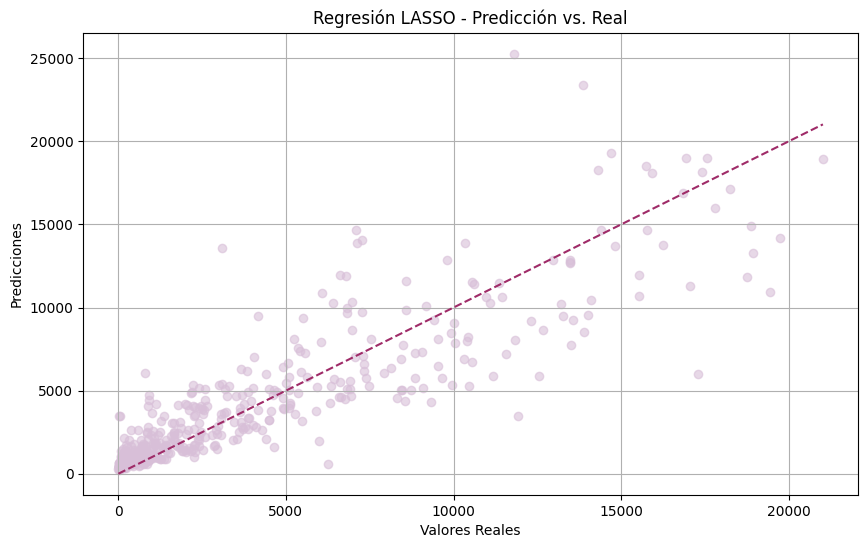

In [ ]:
# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label="Predicciones", color='#D8BFD8')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#9F2B68', linestyle='--', label="Línea ideal (y=x)")
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Regresión LASSO - Predicción vs. Real')
plt.grid(True)
plt.show()

In [ ]:
# Red Neuronal speedrun

# Importar las librerías necesarias
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Definir el modelo de red neuronal
modelo_nn = MLPRegressor(max_iter=1000, random_state=42)  # max_iter para asegurar la convergencia

# Definir la distribución de hiperparámetros manualmente (sin scipy.stats)
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Número de neuronas en cada capa oculta
    'activation': ['relu', 'tanh', 'logistic'],  # Función de activación
    'solver': ['adam', 'sgd'],  # Algoritmo de optimización
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Parámetro de regularización L2 (valores específicos)
    'learning_rate': ['constant', 'adaptive'],  # Tasa de aprendizaje
    'learning_rate_init': [0.001, 0.01, 0.1]  # Tasa de aprendizaje inicial (valores específicos)
}

# Configurar RandomizedSearchCV
random_search_nn = RandomizedSearchCV(
    estimator=modelo_nn,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinaciones de hiperparámetros a probar
    scoring='neg_mean_squared_error',  # Métrica de evaluación (MSE negativo)
    cv=5,  # Número de folds en la validación cruzada
    verbose=1,  # Nivel de verbosidad (1 para ver progreso)
    n_jobs=-1,  # Usar todos los núcleos del CPU
    random_state=42  # Semilla para reproducibilidad
)

# Ajustar RandomizedSearchCV a los datos de entrenamiento
random_search_nn.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
mejores_hiperparametros_nn = random_search_nn.best_params_
print(f"Mejores hiperparámetros: {mejores_hiperparametros_nn}")

# Obtener el mejor modelo
mejor_modelo_nn = random_search_nn.best_estimator_

# Predecir con el mejor modelo
y_pred_nn = mejor_modelo_nn.predict(X_test)

# Evaluar el modelo
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Error Cuadrático Medio (MSE): {mse_nn}")
print('R^2: ', r2_score(y_test, y_pred_nn))
print("MAE:", mean_absolute_error(y_test, y_pred_nn))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_nn)))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
3 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 754, in fit
    return se

Mejores hiperparámetros: {'solver': 'adam', 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50), 'alpha': 0.001, 'activation': 'relu'}
Error Cuadrático Medio (MSE): 4929582.251909635
R^2:  0.7791436978351395
MAE: 1382.4503190235412
RMSE:  2220.2662569857775


In [ ]:
# Importar las librerías necesarias
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Definir el modelo de red neuronal
modelo_nn = MLPRegressor(max_iter=1000, random_state=42)  # max_iter para asegurar la convergencia

# Definir la grilla de hiperparámetros para GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Número de neuronas en cada capa oculta
    'activation': ['relu', 'tanh', 'logistic'],  # Función de activación
    'solver': ['adam', 'sgd'],  # Algoritmo de optimización
    'alpha': [0.0001, 0.001, 0.01, 0.1],  # Parámetro de regularización L2
    'learning_rate': ['constant', 'adaptive'],  # Tasa de aprendizaje
    'learning_rate_init': [0.001, 0.01, 0.1]  # Tasa de aprendizaje inicial
}

# Configurar GridSearchCV
grid_search_nn = GridSearchCV(
    estimator=modelo_nn,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Métrica de evaluación (MSE negativo)
    cv=5,  # Número de folds en la validación cruzada
    verbose=1,  # Nivel de verbosidad (1 para ver progreso)
    n_jobs=-1  # Usar todos los núcleos del CPU
)

# Ajustar GridSearchCV a los datos de entrenamiento
grid_search_nn.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
mejores_hiperparametros_nn = grid_search_nn.best_params_
print(f"Mejores hiperparámetros: {mejores_hiperparametros_nn}")

# Obtener el mejor modelo
mejor_modelo_nn = grid_search_nn.best_estimator_

# Predecir con el mejor modelo
y_pred_nn = mejor_modelo_nn.predict(X_test)

# Evaluar el modelo
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Error Cuadrático Medio (MSE): {mse_nn}")
print('R^2: ', r2_score(y_test, y_pred_nn))
print("MAE:", mean_absolute_error(y_test, y_pred_nn))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_nn)))

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
144 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 754, in fit
    retu

Mejores hiperparámetros: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'solver': 'adam'}
Error Cuadrático Medio (MSE): 4929582.251909635
R^2:  0.7791436978351395
MAE: 1382.4503190235412
RMSE:  2220.2662569857775


**NO SE ENCONTRARON RESULTADOS SATISFACTIORIOS, SE UTILIZARAN LOS INICIALES**